# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 02<br/><br/>Data Preprocessing, EDA and Classification Analysis<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>IP Network Traffic Flows</font>**

### <center>Introduction </center>

**Dataset Name**: IP Network Traffic Flows
     
  The given dataset is about the network flow statistics collected by performing packet captures over 6 days of April 2017. It contains information about an IP flow. An Ip flow consists of all traffic that belongs to the same communication context, that is the same connection between two network devices.  Information about a sequence of packets is included. Datafields like Source IP, destination IP, source and destination port addresses, protocols used, interarrival times(time gap between two packets), etc are stored and are collected through CICIFlowmeter app.
 
**Dataset link**:https://www.kaggle.com/datasets/jsrojas/ip-network-traffic-flows-labeled-with-87-apps <br/>
**Documentation**: https://github.com/Gangaraj-eng/IT496_DataForce_CourseProject1/blob/Course_Project_2/README.md


**Problem statement - Application layer protocol identification** Based on the network flow details, the task is to classify which application layer protocol, the given flow used based on attributes like number of forward and backward packets, flags used, forward and backward segments, etc.

### <center>Exploratory Data Analysis</center>

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [3]:
# the path of the csv file
csv_file_path = "C:\\Users\\Rishit Shah\\Documents\\Semester 7\\Introduction to Data Mining\\Course Project 2\\Dataset-Unicauca-Version2-87Atts.csv"
Data = pd.read_csv(csv_file_path)

Data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [4]:
Data.shape

(3577296, 87)

The dataset contains $35,77,296$rows and $87$columns.

Reducing the dataset size due to limit in RAM

In [5]:
import random
# randomly select 100000 instances
Data =  Data.sample(n=100000)

In [6]:
Data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2214462 to 805277
Data columns (total 87 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow.ID                      100000 non-null  object 
 1   Source.IP                    100000 non-null  object 
 2   Source.Port                  100000 non-null  int64  
 3   Destination.IP               100000 non-null  object 
 4   Destination.Port             100000 non-null  int64  
 5   Protocol                     100000 non-null  int64  
 6   Timestamp                    100000 non-null  object 
 7   Flow.Duration                100000 non-null  int64  
 8   Total.Fwd.Packets            100000 non-null  int64  
 9   Total.Backward.Packets       100000 non-null  int64  
 10  Total.Length.of.Fwd.Packets  100000 non-null  int64  
 11  Total.Length.of.Bwd.Packets  100000 non-null  float64
 12  Fwd.Packet.Length.Max        100000 non-null  int64  
 13

Most of the attributes are of numeric type, except a few nominal attributes like ProtocolName, Label,

In [8]:
Data.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.00000,100000.000000,...,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,37958.060470,12087.939090,6.005800,2.536420e+07,64.755720,67.819540,4.913188e+04,9.222092e+04,507.37335,9.255000,...,25.700110,2.947962e+05,1.833940e+05,5.188280e+05,1.641171e+05,8.495398e+06,1.367473e+06,9.708338e+06,7.227824e+06,103.048430
std,22035.863801,20490.839182,0.338774,4.007463e+07,1136.022228,1395.622959,1.960339e+06,2.954690e+06,1019.25379,81.891952,...,6.023175,2.254255e+06,1.281889e+06,3.178991e+06,1.949495e+06,1.701932e+07,4.823641e+06,1.884876e+07,1.595310e+07,51.352511
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,...,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000
25%,3579.750000,443.000000,6.000000,6.240000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.00000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,91.000000
50%,49367.000000,3128.000000,6.000000,5.659665e+05,6.000000,5.000000,4.345000e+02,2.040000e+02,206.00000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,126.000000
75%,53797.250000,3128.000000,6.000000,4.500067e+07,15.000000,15.000000,1.748000e+03,3.626250e+03,609.00000,6.000000,...,32.000000,4.000000e+01,0.000000e+00,5.100000e+01,1.000000e+00,7.192444e+06,0.000000e+00,7.652468e+06,5.338130e+06,130.000000
max,65534.000000,65528.000000,17.000000,1.200000e+08,148549.000000,315700.000000,3.283886e+08,7.036091e+08,24624.00000,4945.000000,...,44.000000,1.105897e+08,6.442244e+07,1.105897e+08,1.105897e+08,1.198461e+08,7.329062e+07,1.198461e+08,1.198461e+08,222.000000


Plotting the correlation matrix

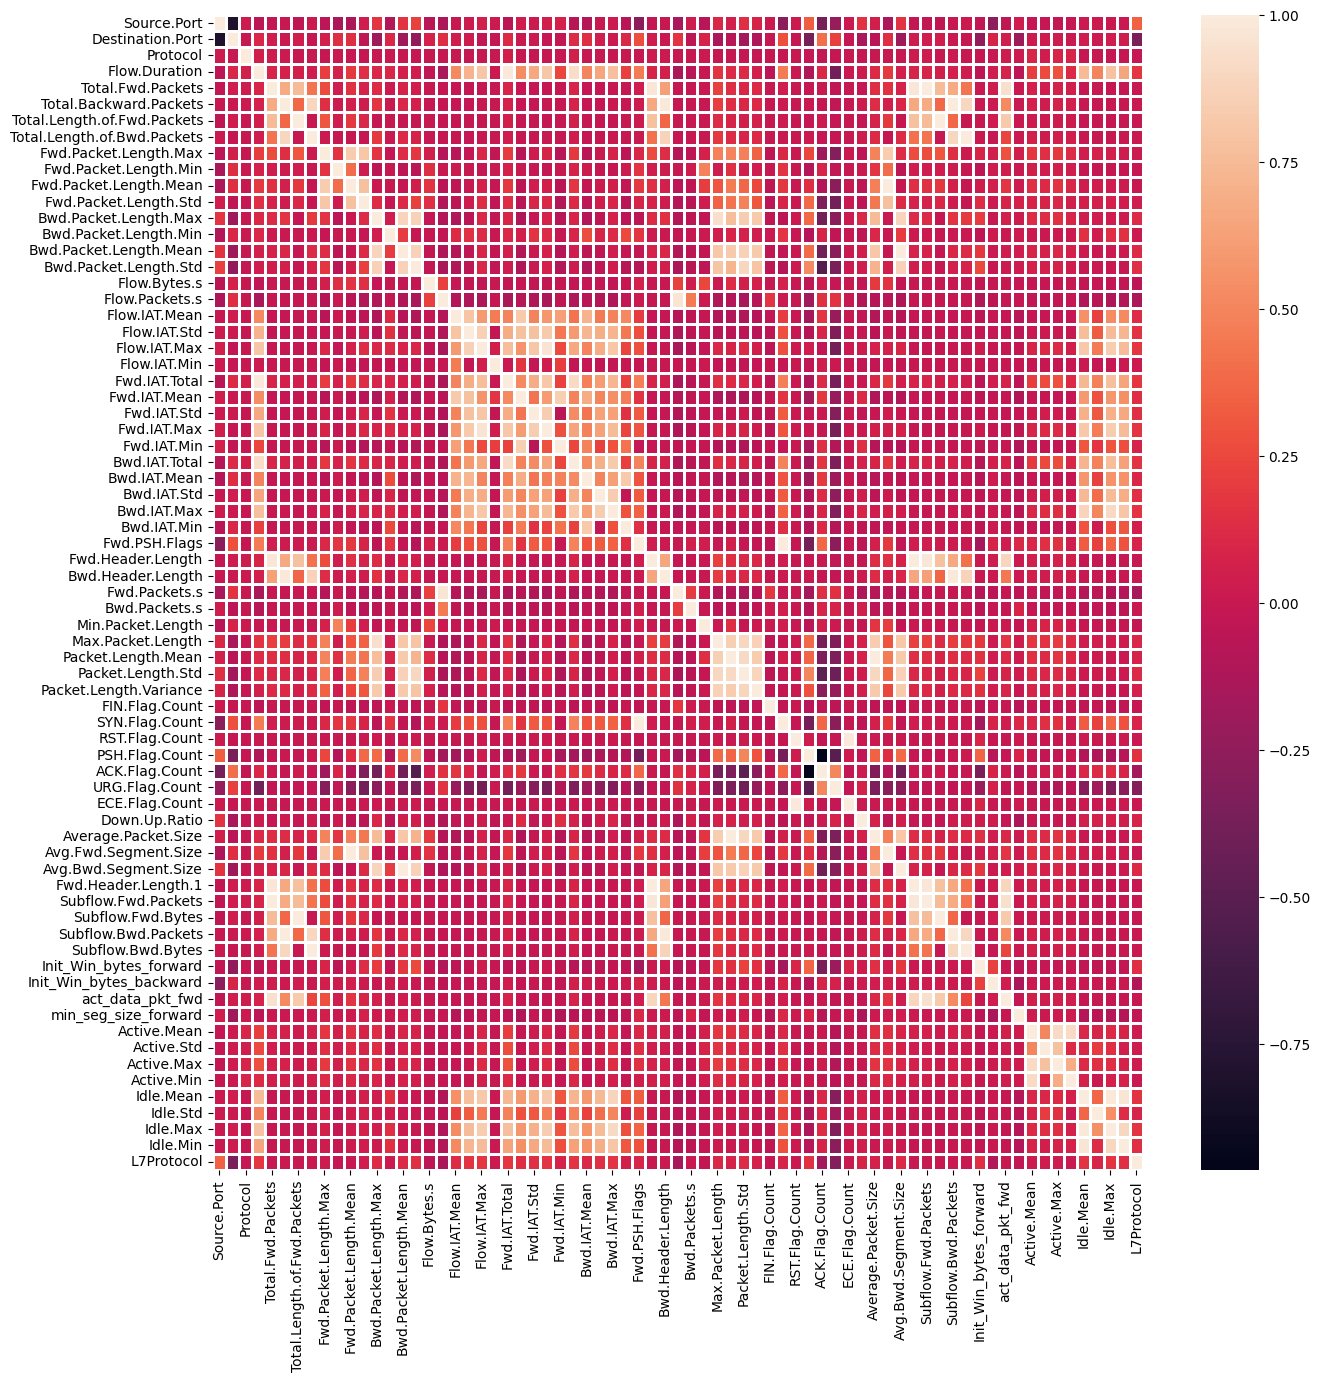

In [9]:
numeric_data = Data.select_dtypes(include =[np.number]) # keep only numerical columns
numeric_data = numeric_data[[col for col in numeric_data if numeric_data[col].nunique() > 1]]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data = corr_matrix, lw=1)
plt.show()

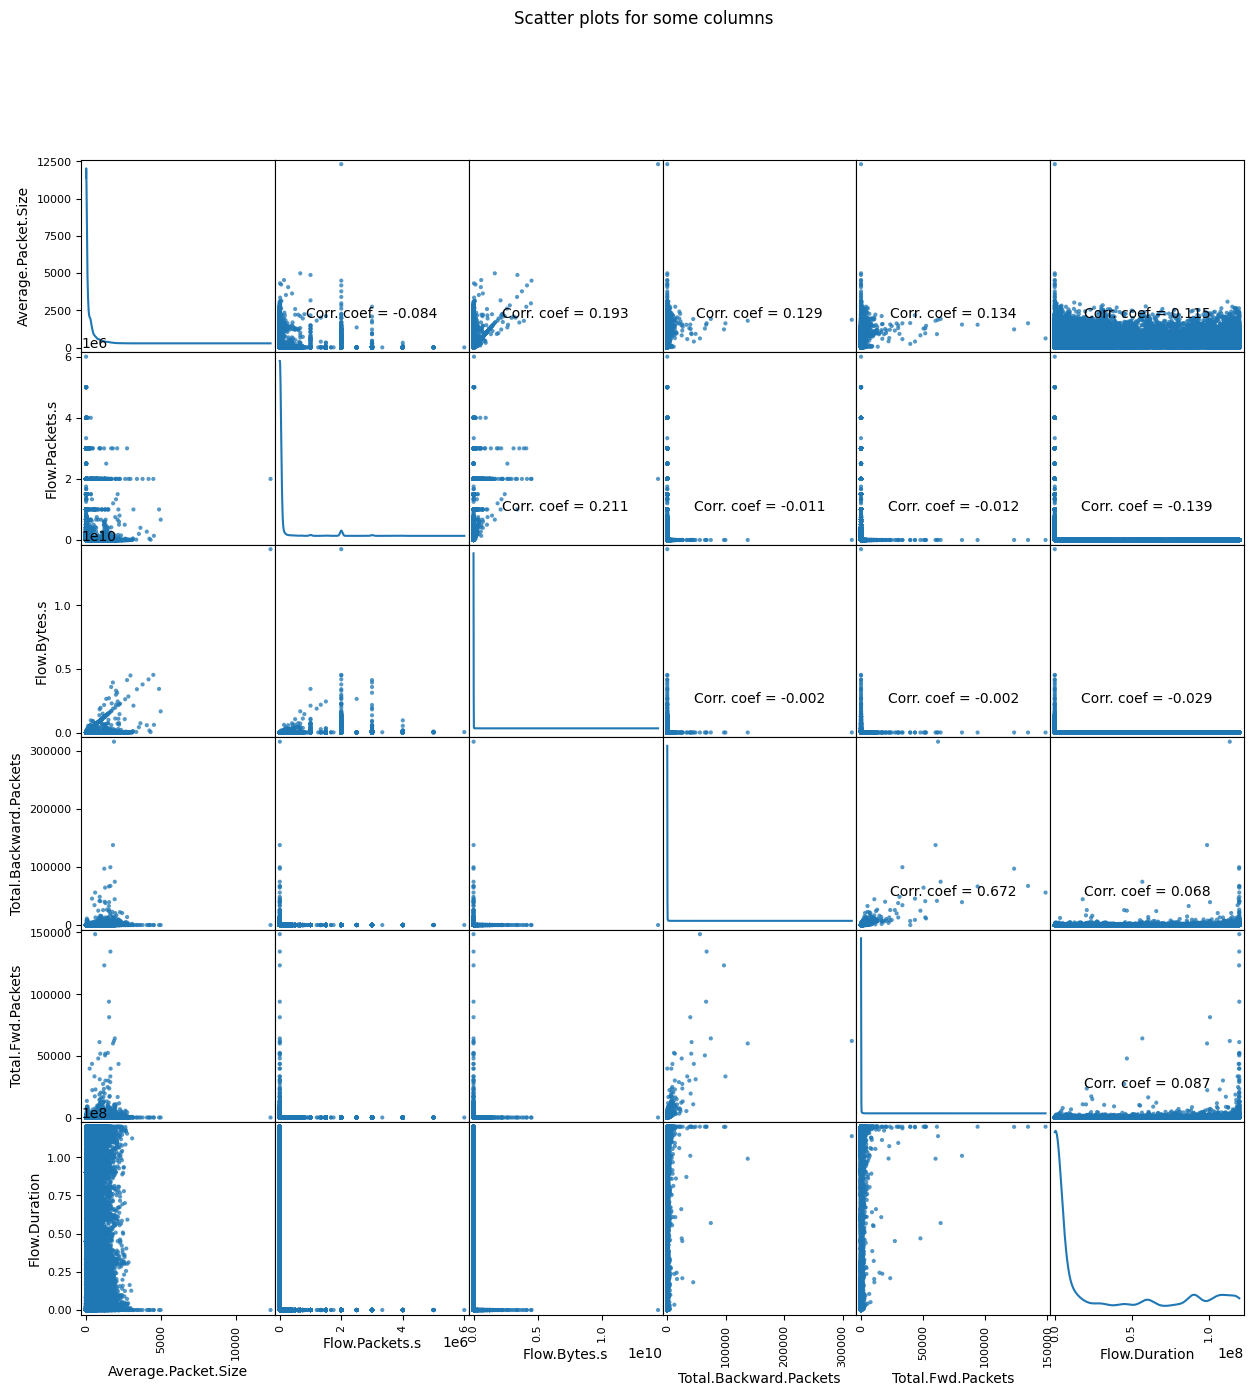

In [10]:
ipMeasureColumns = ['Average.Packet.Size','Flow.Packets.s','Flow.Bytes.s','Total.Backward.Packets','Total.Fwd.Packets','Flow.Duration']

ax = pd.plotting.scatter_matrix(Data[ipMeasureColumns], alpha=0.75, figsize=[15,15], diagonal='kde')
corrs = Data[ipMeasureColumns].corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.5, 0.2), xycoords='axes fraction', ha='center', va='center')
plt.suptitle('Scatter plots for some columns')
plt.show()

There is no high correlation between any of thes columns

Boxplots for the numeric columns

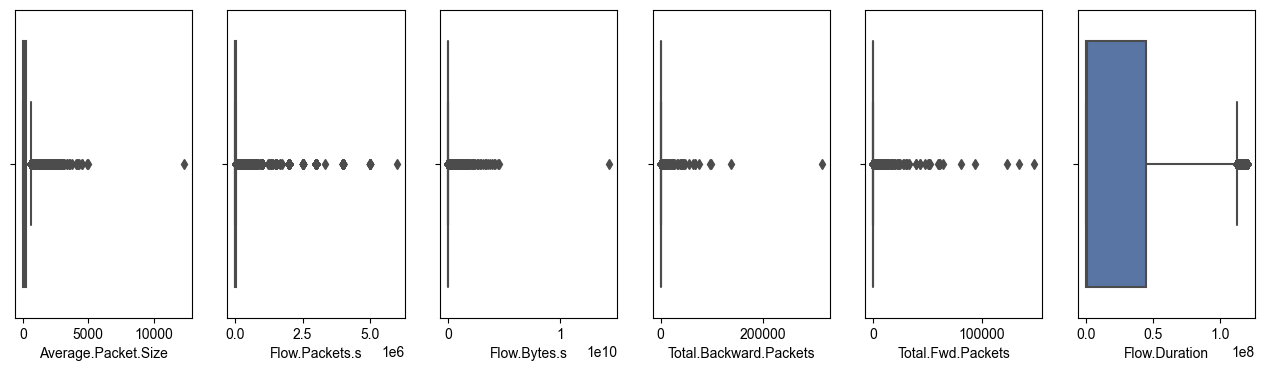

In [11]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(ipMeasureColumns):
    sns.boxplot(x=Data[col], ax=ax[axid])

All of these columns are right-skewed!!

In [12]:
uniqueProtocols=Data['ProtocolName'].unique()
print(uniqueProtocols)

['HTTP' 'AMAZON' 'HTTP_PROXY' 'YOUTUBE' 'GOOGLE' 'HTTP_CONNECT' 'SSL'
 'TWITTER' 'GMAIL' 'WINDOWS_UPDATE' 'FACEBOOK' 'MICROSOFT' 'CLOUDFLARE'
 'APPLE_ICLOUD' 'SKYPE' 'DROPBOX' 'INSTAGRAM' 'APPLE' 'UBUNTUONE' 'YAHOO'
 'MSN' 'TOR' 'WIKIPEDIA' 'NETFLIX' 'CONTENT_FLASH' 'DNS' 'OFFICE_365'
 'WHATSAPP' 'APPLE_ITUNES' 'EASYTAXI' 'FTP_DATA' 'IP_ICMP' 'TEAMVIEWER'
 'GOOGLE_MAPS' 'MS_ONE_DRIVE' 'EBAY' 'SPOTIFY' 'EDONKEY' 'MQTT'
 'SSL_NO_CERT' 'NTP' 'HTTP_DOWNLOAD' 'TWITCH' 'LASTFM' 'BGP' 'DEEZER'
 'WAZE' 'TEAMSPEAK' 'CNN' 'SNMP']


Lets see the distribution of these protocols

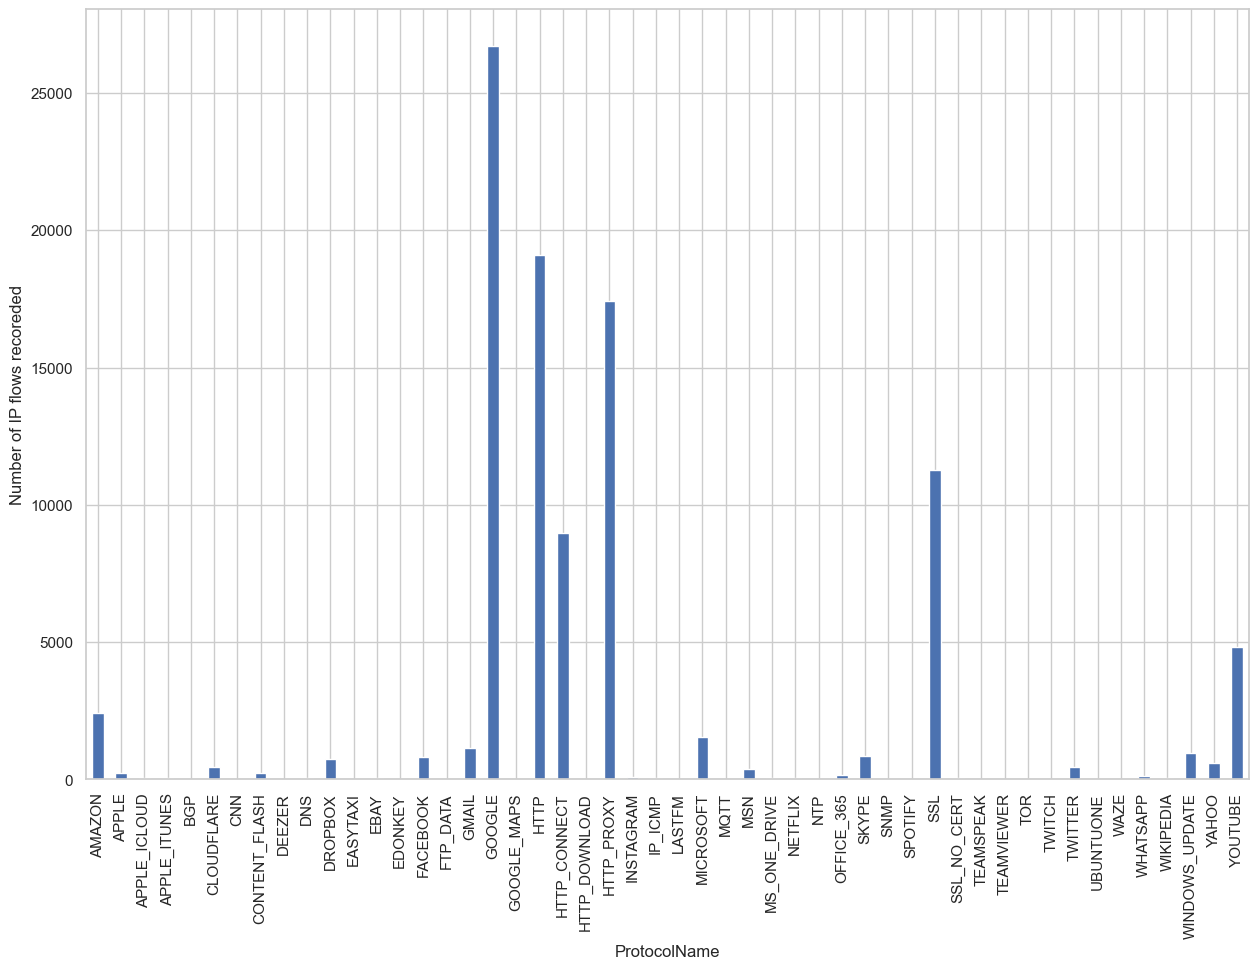

In [13]:
Data.groupby('ProtocolName').size().plot(kind='bar',figsize=(15,10))
plt.ylabel('Number of IP flows recoreded')
plt.show()

We can see that most of the ip flows are using Google Protocol followed by HTTP and HTTP_Proxy!!

In [14]:
Data['Label'].unique()

array(['BENIGN'], dtype=object)

The label attribute has only a single value for all examples and thus not so useful in classification analysis!!. Hence, it can be ignored

In [15]:
Data['Timestamp']

2214462    09/05/201711:30:13
2851289    11/05/201703:26:08
2509863    11/05/201710:03:05
2833392    11/05/201711:09:38
1895864    09/05/201709:04:56
                  ...        
1626482    28/04/201709:47:52
3283353    15/05/201711:04:26
1838405    28/04/201710:11:30
1207468    27/04/201704:11:56
805277     27/04/201709:56:24
Name: Timestamp, Length: 100000, dtype: object

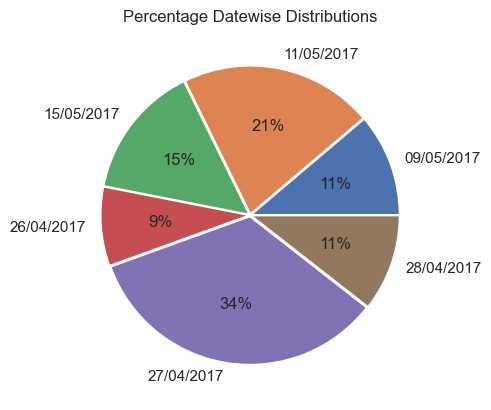

In [16]:
def getDateFromTimeStamp(timestamp):
    return timestamp[0:10]

df=Data
df['Timestamp']=df['Timestamp'].apply(getDateFromTimeStamp)
df.groupby('Timestamp').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01]*6,title='Percentage Datewise Distributions')
plt.show()

The above plot shows the distribution of data recoreded on 6 days.

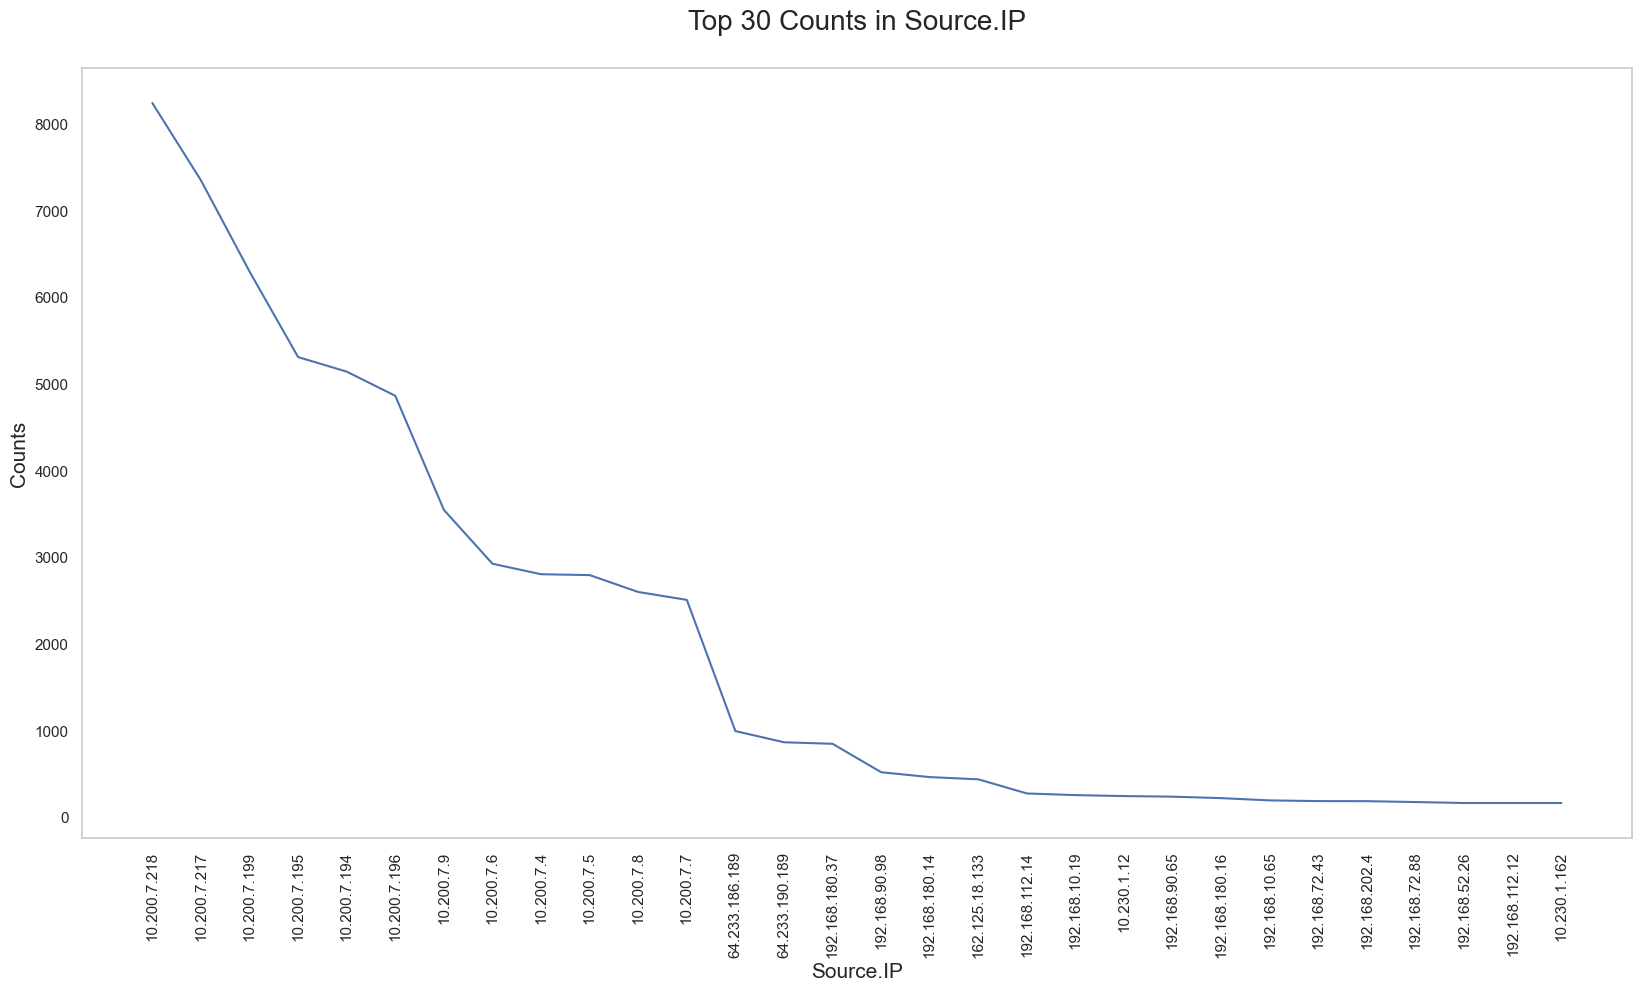

In [17]:
sourceIPCounts = pd.DataFrame(Data['Source.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(sourceIPCounts)
# to display the ip address verticall
plt.xticks(rotation=90)
plt.xlabel('Source.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Source.IP\n', {'fontsize':20})
plt.grid()

These are the 30 most soucre IP addresses recorded with corresponding frequencies

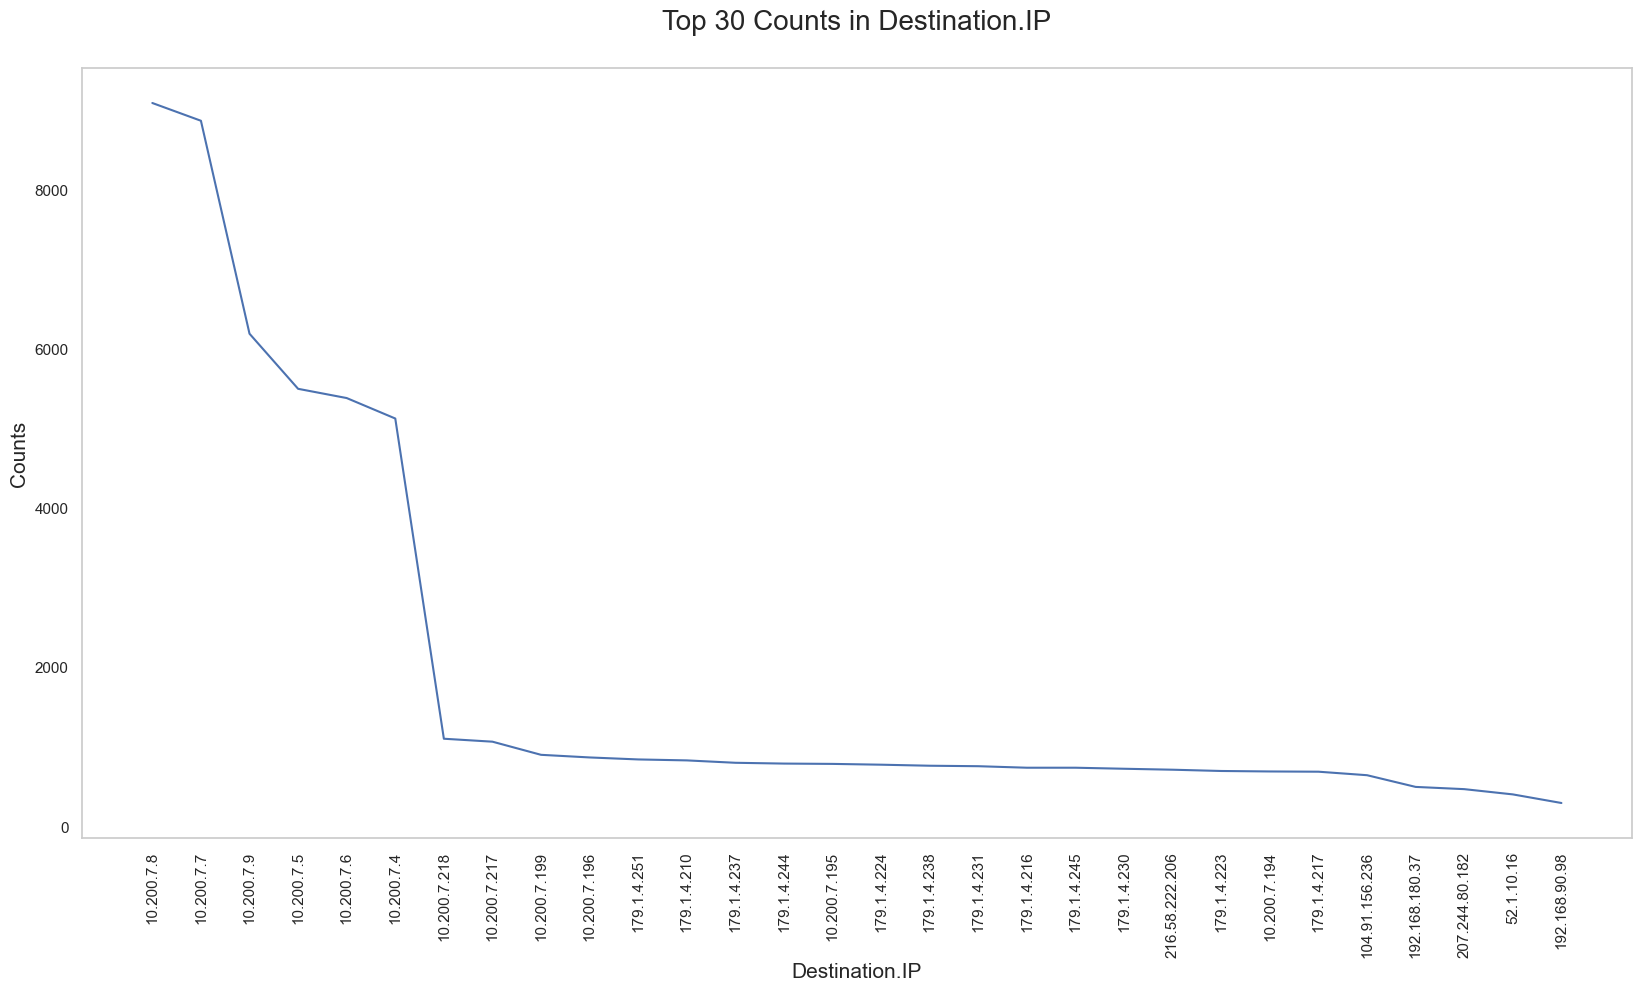

In [18]:
DestIpCounts = pd.DataFrame(Data['Destination.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(DestIpCounts)
# to display the ip address verticall
plt.xticks(rotation=90)
plt.xlabel('Destination.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Destination.IP\n', {'fontsize':20})
plt.grid()

We can see that most of the ip flows are using Google Protocol followed by HTTP and HTTP_Proxy!!

In [19]:
Data['Label'].unique()

array(['BENIGN'], dtype=object)

The label attribute has only a single value for all examples and thus not so useful in classification analysis!!. Hence, it can be ignored

In [20]:
Data['Timestamp']

2214462    09/05/2017
2851289    11/05/2017
2509863    11/05/2017
2833392    11/05/2017
1895864    09/05/2017
              ...    
1626482    28/04/2017
3283353    15/05/2017
1838405    28/04/2017
1207468    27/04/2017
805277     27/04/2017
Name: Timestamp, Length: 100000, dtype: object

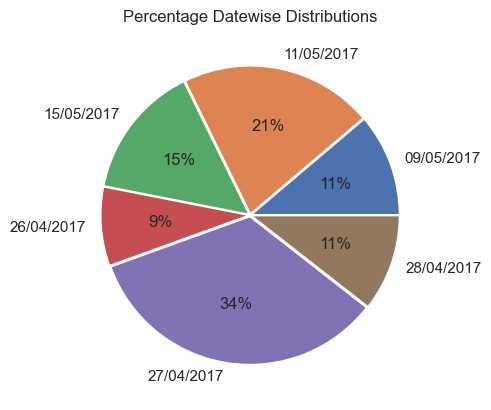

In [21]:
def getDateFromTimeStamp(timestamp):
    return timestamp[0:10]

df=Data
df['Timestamp']=df['Timestamp'].apply(getDateFromTimeStamp)
df.groupby('Timestamp').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01]*6,title='Percentage Datewise Distributions')
plt.show()